## Polynomial Logistic Regression

[![Data](https://i.stack.imgur.com/pRDoo.png)](https://stats.stackexchange.com/questions/549852/can-any-data-be-learned-using-polynomial-logistic-regression)

*Click the Image for more Info*

Using Logistic Regression for Non-Linear Data

Polynomial logistic regression is an extension of the logistic regression algorithm where the relationship between the input features and the output is modeled as a polynomial function instead of a linear function. This allows for more complex decision boundaries between classes, which can be useful when the relationship between features and the target variable is nonlinear.

Here's how polynomial logistic regression works:

1. **Input Data**: Like in traditional logistic regression, you start with a dataset consisting of input features and corresponding labels. 

2. **Feature Transformation**: In polynomial logistic regression, the input features are transformed into polynomial features. This means that each feature is raised to different powers to create new features. For example, if you have a single feature \( x \), transforming it into a polynomial of degree 2 would involve adding a new feature x^2. If you have multiple features, the transformation would involve creating all possible combinations of polynomial terms up to the specified degree.

3. **Model Building**: Once the polynomial features are created, logistic regression is applied to the transformed dataset. The logistic regression model learns the relationship between the polynomial features and the target variable (class labels) using the logistic function.

4. **Training**: During the training phase, the parameters of the logistic regression model are adjusted to minimize the error between the predicted probabilities and the actual class labels. This is typically done using optimization algorithms such as gradient descent.

5. **Prediction**: Once the model is trained, it can be used to predict the probability that new input instances belong to each class. The class with the highest probability is then chosen as the predicted class.

Polynomial logistic regression allows for more flexibility in capturing the relationship between input features and the target variable compared to traditional logistic regression. However, it can also lead to overfitting if the degree of the polynomial is too high relative to the size of the dataset. Therefore, it's important to tune the degree of the polynomial carefully to balance model complexity and performance.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('ushape.csv', header=None)

In [4]:
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [5]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

[]

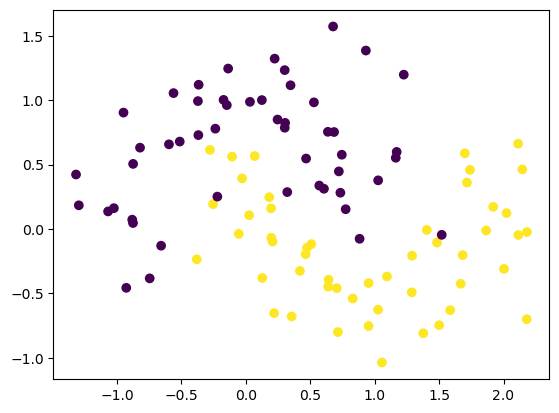

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot()

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

In [8]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

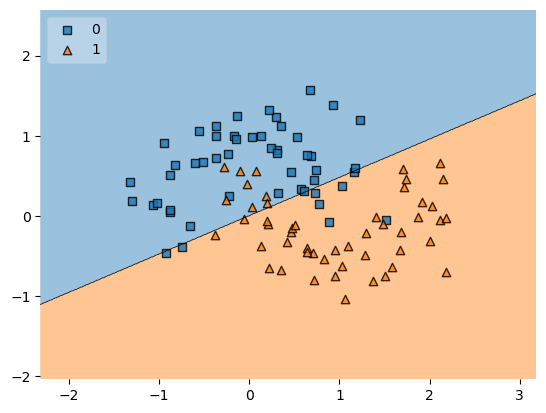

In [9]:
plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [10]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.8300000000000001

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_trf = poly.fit_transform(X)

In [12]:
clf1 = LogisticRegression()

In [13]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.9

In [14]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

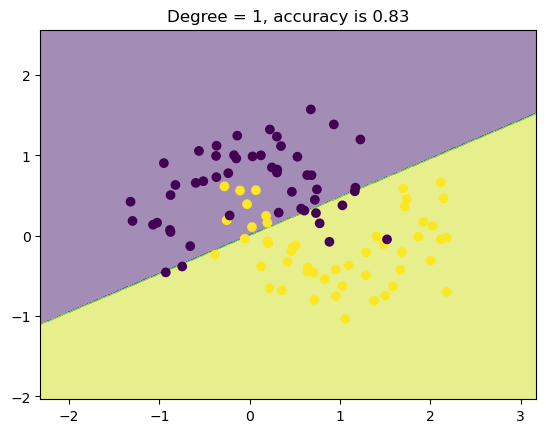

In [15]:
plot_decision_boundary(X,y)

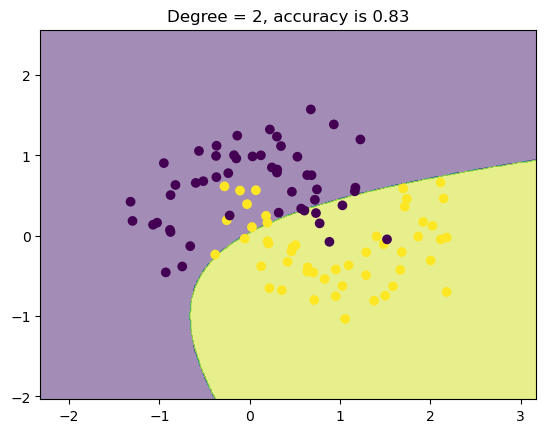

In [16]:
plot_decision_boundary(X,y,degree=2)

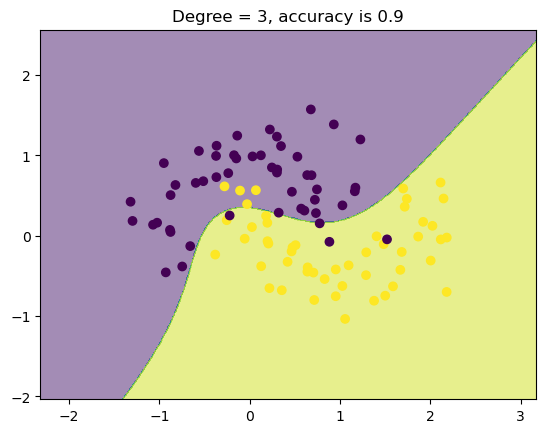

In [17]:
plot_decision_boundary(X,y,degree=3)

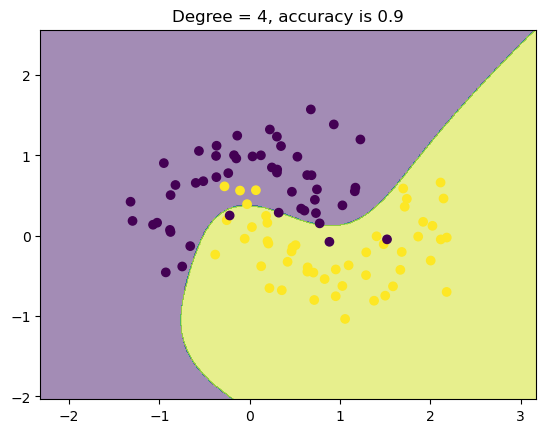

In [18]:
plot_decision_boundary(X,y,degree=4)

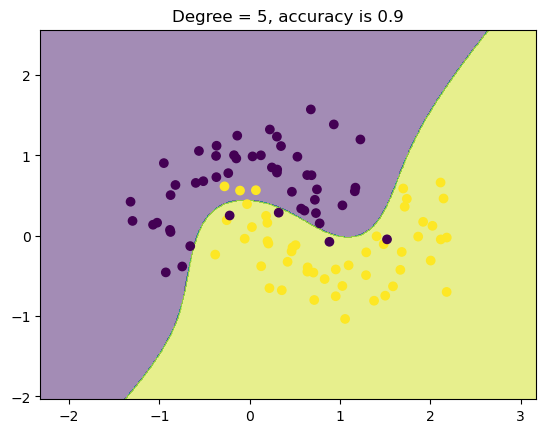

In [19]:
plot_decision_boundary(X,y,degree=5)

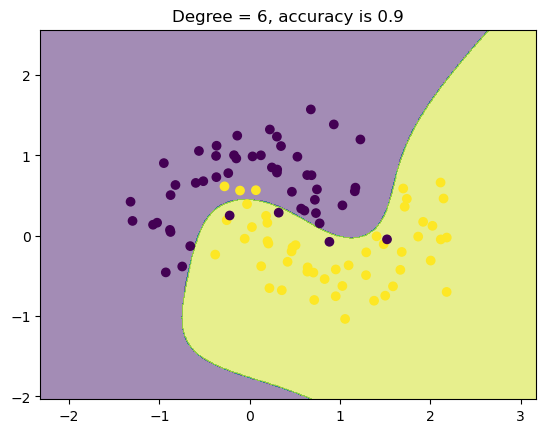

In [20]:
plot_decision_boundary(X,y,degree=6)

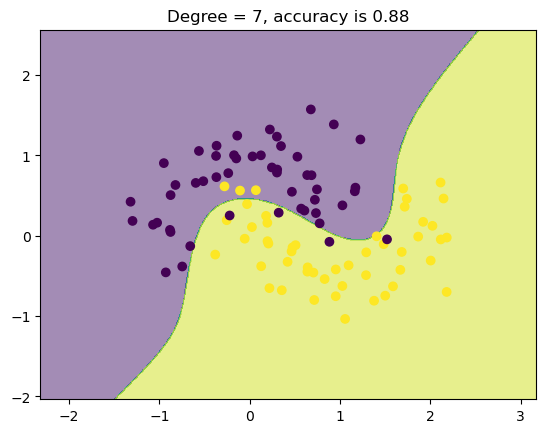

In [21]:
plot_decision_boundary(X,y,degree=7)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

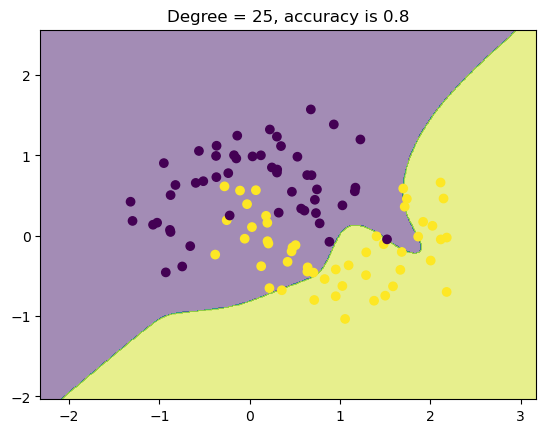

In [22]:
plot_decision_boundary(X,y,degree=25)